# A simple demonstration

*This notebook illustrates some of the methods available as well as the complete 'pipeline' for computing the total area of overlapping circles (when accounting for overlapping areas only once)*

--- 

### Imports

##### General

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

##### Package

In [2]:
from geom.circl import Point, Circle

--- 

### Definitions

##### Function for (fig,ax) with specific parameters

In [3]:
def figAx(xrange, yrange):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ### Spines parameters
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ### Limits parameters
    ax.set_xlim([xrange[0], xrange[1]])
    ax.set_ylim([yrange[0], yrange[1]])
    ### Ticks parameters
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    plt.xticks(np.arange(xrange[0], xrange[1]+1, 2.0))
    plt.yticks(np.arange(yrange[0], yrange[1]+1, 2.0))
    ## Grid
    plt.grid(b=True, which='major', color='grey', linestyle='--')
    
    return fig, ax

 ---

### Example

##### Intro

Everyting sits within the Circle class. Either provide it a set of circles to initialize:

In [4]:
mc = Circle([[10,10,2],[10,16,6]])

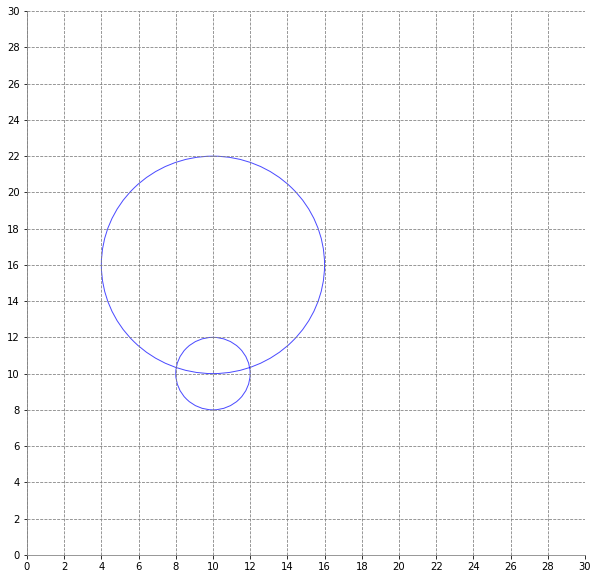

In [5]:
fig, ax = figAx([0,30],[0,30])
for c in mc:
    cplot = plt.Circle((c.x, c.y), c.r, fill=False, color='blue', alpha=.7)
    ax.add_artist(cplot)

Or create them randomly:

In [6]:
mc = Circle.random(x_min=3, x_max=27, y_min=3, y_max=27, radius_min=1, radius_max=2, nr_circles=100)

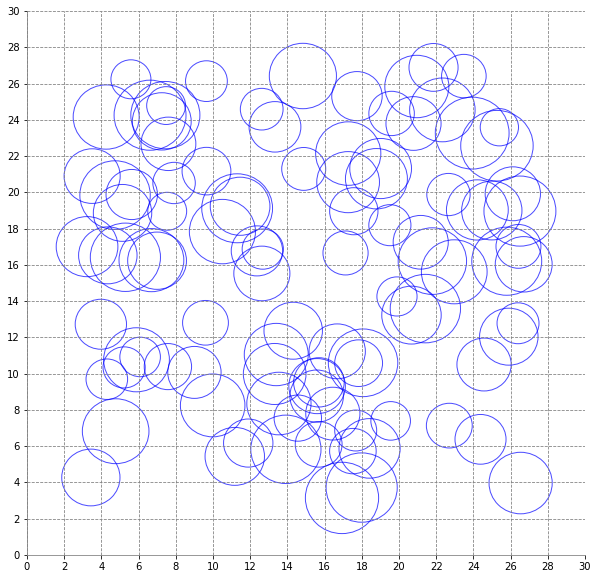

In [7]:
fig, ax = figAx([0,30],[0,30])
for c in mc:
    cplot = plt.Circle((c.x, c.y), c.r, fill=False, color='blue', alpha=.7)
    ax.add_artist(cplot)

##### Example of a method

Sine the parent class is the np.ndarray, some methods work in a vectorized fashion. This is the case for example for computing all intersections with a Circle.

In [8]:
i1, i2 = mc.drop(0).intersect(mc[0])

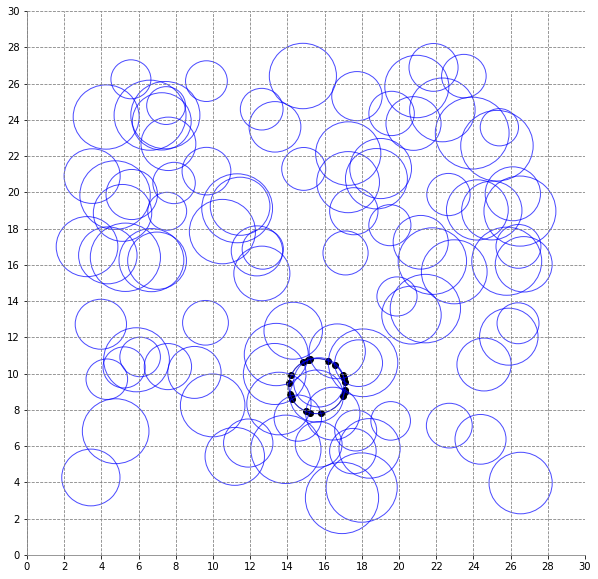

In [9]:
fig, ax = figAx([0,30], [0,30])
cplot = plt.Circle((mc[0].x, mc[0].y), mc[0].r, fill=False, color='black', alpha=.5)
ax.add_artist(cplot)
for c in mc:
    cplot = plt.Circle((c.x, c.y), c.r, fill=False, color='blue', alpha=.7)
    ax.add_artist(cplot)
plt.scatter(i1.x, i1.y, color='black')
plt.scatter(i2.x, i2.y, color='black')

#### Example calculating the total area

Calculating the total area requires a few steps.

(1) Get all the intersections.

In [10]:
mc.calc_intersections()

(2) From which we can compute the different clusters.

In [11]:
mc.calc_clusters()

(3) Then for each cluster we compute the (inner and outer) boundaries of the cluster, after which we can compute the area.

In [12]:
all_areas = []
for i in range(mc.nr_clusters):
    cluster = mc.get_cluster(i)
    cluster.calc_boundaries()
    area = cluster.flatArea()
    all_areas.append(area)
print(sum(all_areas))

433.1467241625908


For some control we can compute the area by simulating points in a bounded box and mulitplying the share within the box with the area of that box.

In [14]:
mc.simArea()

433.4715536067367

##### Plotting

Some of the intermediary results can be used for plotting.
* We plot single-circle clusters blue, double-circle clusters orange and three-or-more-circle clusters green. 
* We link the outer boundaries with a solid black line, the inner boundaries with a green dotted line. 
* Circles on the outer boundary which are more than half over the boundary segment get a plus sign. The same is done for circles on the inner boundary with a minus sign.

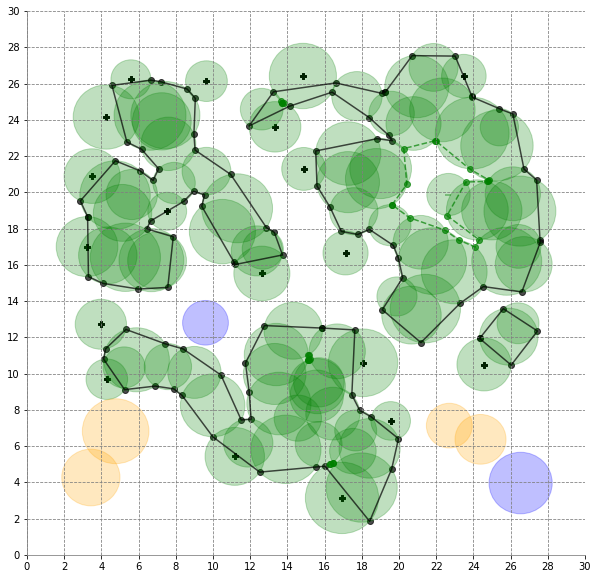

In [13]:
fig, ax = figAx([0,30],[0,30])

for i in range(mc.nr_clusters):
    cluster = mc.get_cluster(i)
    
    if len(cluster)==1:
        c = cluster[0]
        cplot = plt.Circle((c.x, c.y), c.r, color='blue', fill=True, alpha=.25)
        ax.add_artist(cplot)
        
    if len(cluster)==2:
        for c in cluster:
            cplot = plt.Circle((c.x, c.y), c.r, color='orange', fill=True, alpha=.25)
            ax.add_artist(cplot)
        
    if len(cluster)>2:
        # For every cluster...
        for c in cluster:
            cplot = plt.Circle((c.x, c.y), c.r, color='green', fill=True, alpha=.25)
            ax.add_artist(cplot)
            
        cluster.calc_boundaries()
        # Get the outer boundaries & Circles. 
        ordered_b, _ = cluster.outer_boundaries
        # Close the loop.
        ordered_all = Point([ordered_b[-1]]+ordered_b)
        # Scatter boundaries and plot segments in dotted lines.
        plt.scatter(ordered_all.x, ordered_all.y, color='black', alpha=.7)
        plt.plot(ordered_all.x, ordered_all.y, c='black', alpha=.7)
        
        # For every hole in the cluster...
        for inner_boundary in cluster.inner_boundaries:
            # Get the boundaries & Circles. 
            ordered_b, _ = inner_boundary
            # Close the loop.
            ordered_all = Point([ordered_b[-1]]+ordered_b)
            # Scatter boundaries and plot segments in dotted lines.
            plt.scatter(ordered_all .x, ordered_all .y, c='green', alpha=.7)
            plt.plot(ordered_all .x, ordered_all .y, c='green', ls='--', alpha=.7)
            
        # Calculate Area (and edge case circles)
        A, o, i = cluster.flatArea(return_edge_cases=True)
        plt.scatter(o.x, o.y, c='black', marker='P')
        try:
            plt.scatter(i.x, i.y, c='green', marker='_', alpha=.5)
        except:
            i=None

--- 